In [ ]:
from matplotlib import animation
import matplotlib.pyplot as plt
import numpy as np


def euler_cromer_calculate(theta0, omega0, t0, tf, dt):
    """Euler-Cromer method to solve the equation of motion for a damped driven pendulum.

    input:
        theta0: initial angle
        omega0: initial angular velocity
        t0: initial time
        tf: final time
        dt: time step

    return:
        t: array of time
        theta: array of theta
        omega: array of omega
    """
    # initialize
    N = int((tf - t0) / dt) + 1
    t = np.linspace(t0, tf, N)
    theta = np.zeros(N)
    omega = np.zeros(N)
    theta[0] = theta0
    omega[0] = omega0

    # iteration
    for i in range(N - 1):
        omega[i + 1] = omega[i] - (g / l * np.sin(theta[i]) + q * omega[i] + F_D * np.sin(Omega_D * t[i])) * dt
        theta[i + 1] = (theta[i] + omega[i + 1] * dt + np.pi) % (2 * np.pi) - np.pi  # (theta+pi) % (2*pi) - pi, keeps theta in [-pi, pi]

    return t, theta, omega

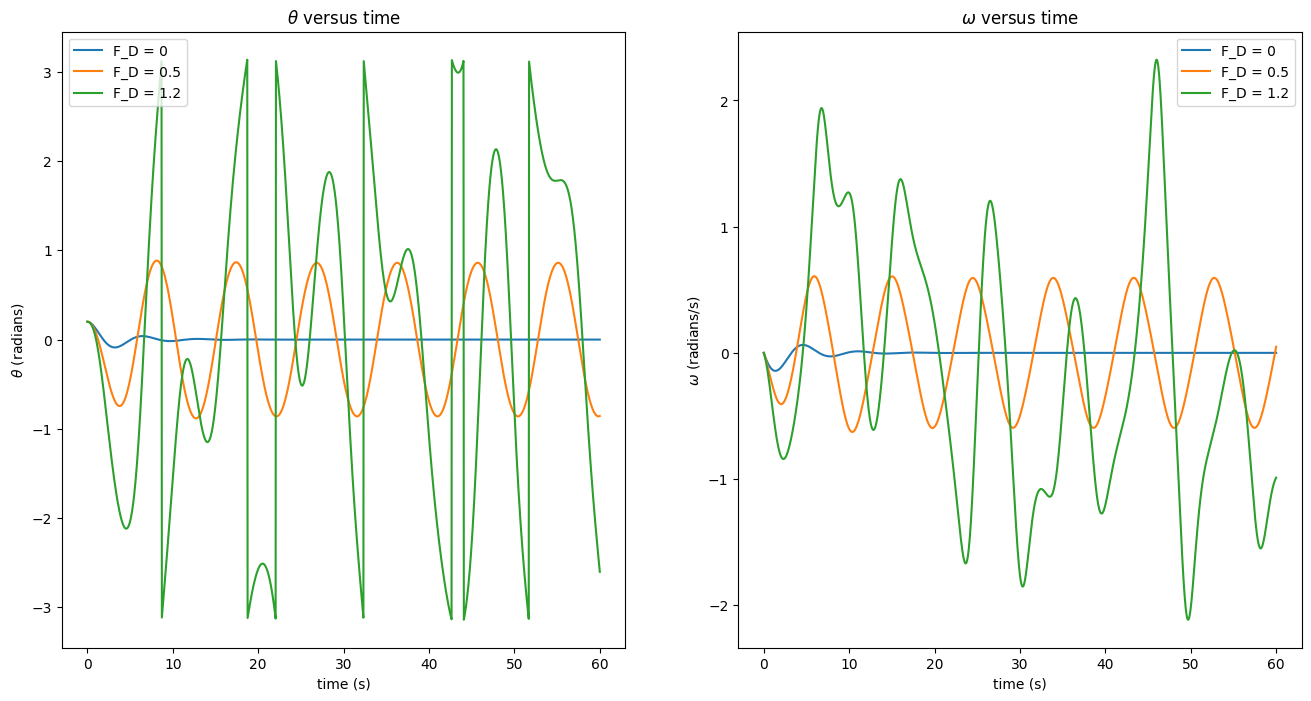

In [ ]:
# set parameters
g = 9.8  # m/s^2
l = 9.8  # length of the pendulum

q = 1 / 2  # damping factor

Omega_D = 2 / 3  # driving frequency
F_D = 0  # Driving force

theta0 = 0.2  # initial angle
omega0 = 0.0  # initial angular velocity
t0 = 0.0  # initial time
tf = 60.0  # final time
dt = 0.04  # time step


# plot
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16, 8))

F_D = 0
t, theta, omega = euler_cromer_calculate(theta0, omega0, t0, tf, dt)
ax1.plot(t, theta, label="F_D = 0")
ax2.plot(t, omega, label="F_D = 0")

F_D = 0.5
t, theta, omega = euler_cromer_calculate(theta0, omega0, t0, tf, dt)
ax1.plot(t, theta, label="F_D = 0.5")
ax2.plot(t, omega, label="F_D = 0.5")

F_D = 1.2
t, theta, omega = euler_cromer_calculate(theta0, omega0, t0, tf, dt)
ax1.plot(t, theta, label="F_D = 1.2")
ax2.plot(t, omega, label="F_D = 1.2")

ax1.set_title(r"$\theta$ versus time")
ax1.set_xlabel("time (s)")
ax1.set_ylabel(r"$\theta$ (radians)")
ax1.legend(loc="best")

ax2.set_title(r"$\omega$ versus time")
ax2.set_xlabel("time (s)")
ax2.set_ylabel(r"$\omega$ (radians/s)")
ax2.legend(loc="best")

plt.show()

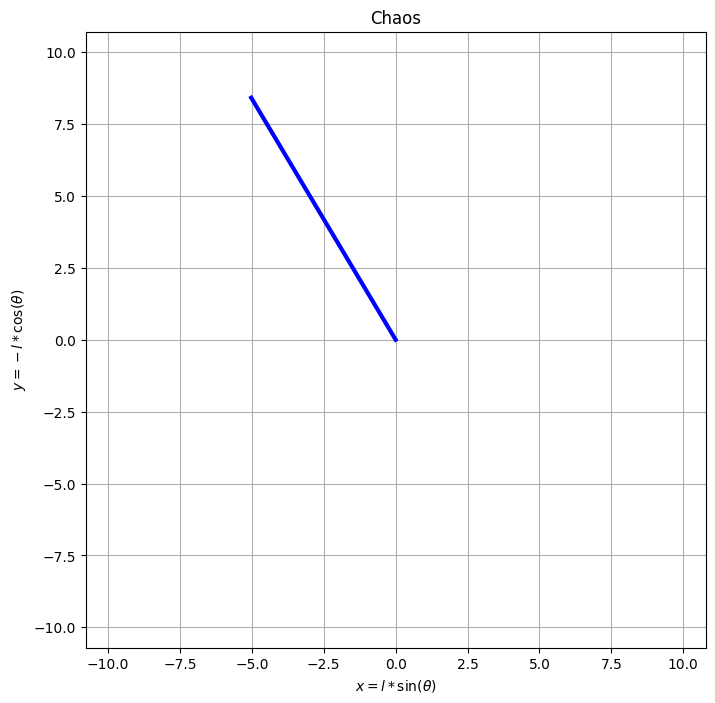

In [ ]:
# animation
def init():
    line.set_data([], [])
    return (line,)


def update(i):
    x = np.sin(theta[i]) * l  # x = l*sin(theta)
    y = -np.cos(theta[i]) * l  # y = -l*cos(theta)
    line.set_data([0, x], [0, y])  # update the line
    return (line,)


fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title("Chaos")
ax.set_xlabel("$x = l*\sin(\\theta)$")
ax.set_ylabel("$y = -l*\cos(\\theta)$")
ax.axis("equal")
ax.set_xlim(-1.1 * l, 1.1 * l)
ax.set_ylim(-1.1 * l, 1.1 * l)
ax.grid()

(line,) = ax.plot([], [], lw=3, color="blue", label="Pendulum")

anim = animation.FuncAnimation(fig=fig, func=update, frames=len(t), init_func=init, interval=200, blit=True)
anim.save("Chaos.gif", writer="pillow", fps=30)

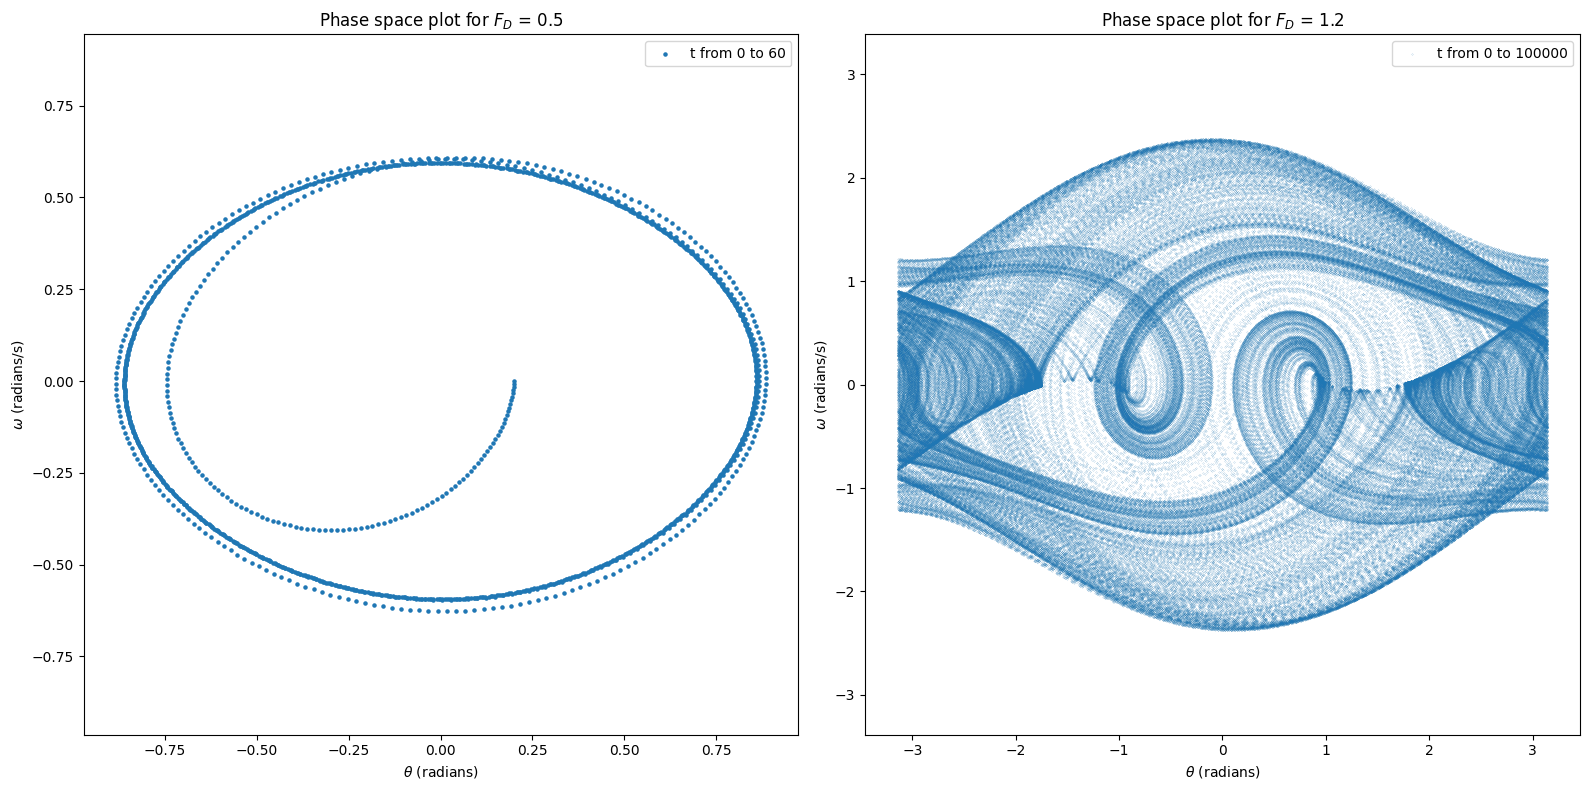

In [ ]:
# phase space plot
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16, 8))

# figure 1
t0 = 0
tf = 60
F_D = 0.5
t, theta, omega = euler_cromer_calculate(theta0, omega0, t0, tf, dt)

ax1.set_title("Phase space plot for $F_D$ = 0.5")
ax1.set_xlabel("$\\theta$ (radians)")
ax1.set_ylabel("$\omega$ (radians/s)")
ax1.axis("equal")
ax1.scatter(theta, omega, s=5, label="t from 0 to 60")
ax1.legend(loc="best")

# figure 2
t0 = 0
tf = 10000
F_D = 1.2
t, theta, omega = euler_cromer_calculate(theta0, omega0, t0, tf, dt)

ax2.set_title("Phase space plot for $F_D$ = 1.2")
ax2.set_xlabel("$\\theta$ (radians)")
ax2.set_ylabel("$\omega$ (radians/s)")
ax2.axis("equal")
ax2.scatter(theta, omega, s=0.01, label="t from 0 to 100000")
ax2.legend(loc="best")

plt.tight_layout()
plt.show()